# Project 12 - Social Networks and Recommendation Systems

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

#### P12.1 Import tweeter data. Draw networks illustrating the relationships inside them. [4P]

In [2]:
tweets = pd.read_csv("tweets.csv")
users = pd.read_csv("users.csv")

In [6]:
tweets.groupby("hashtags")["hashtags"].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

hashtags   count
18342                                []  114666
9890                       ["Politics"]    3143
16769                          ["news"]    1469
17831                          ["tcot"]    1033
7866              ["MerkelMussBleiben"]     796
10451          ["RejectedDebateTopics"]     614
12634                         ["Trump"]     551
12103           ["ThingsYouCantIgnore"]     526
11582   ["SurvivalGuideToThanksgiving"]     518
16586                          ["maga"]     517
6177            ["IdRunForPresidentIf"]     494
12067  ["ThingsMoreTrustedThanHillary"]     492
2176             ["ChristmasAftermath"]     492
1224     ["BetterAlternativeToDebates"]     492
16828                    ["nowplaying"]     479
6509                     ["IslamKills"]     476
6035              ["IHaveARightToKnow"]     475
17103                         ["pjnet"]     472
10695        ["RuinADinnerInOnePhrase"]     469
10358           ["RealLifeMagicSpells"]     469

In [7]:
df = tweets.groupby("hashtags")["hashtags"].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

In [8]:
most_occurring_hastgags = df.iloc[1:15, :]

In [9]:
most_occurring_hastgags

hashtags  count
9890                       ["Politics"]   3143
16769                          ["news"]   1469
17831                          ["tcot"]   1033
7866              ["MerkelMussBleiben"]    796
10451          ["RejectedDebateTopics"]    614
12634                         ["Trump"]    551
12103           ["ThingsYouCantIgnore"]    526
11582   ["SurvivalGuideToThanksgiving"]    518
16586                          ["maga"]    517
6177            ["IdRunForPresidentIf"]    494
12067  ["ThingsMoreTrustedThanHillary"]    492
2176             ["ChristmasAftermath"]    492
1224     ["BetterAlternativeToDebates"]    492
16828                    ["nowplaying"]    479

In [10]:
import seaborn as sns

[Text(0.5, 1.0, '14 Most occurring troll hashtags')]

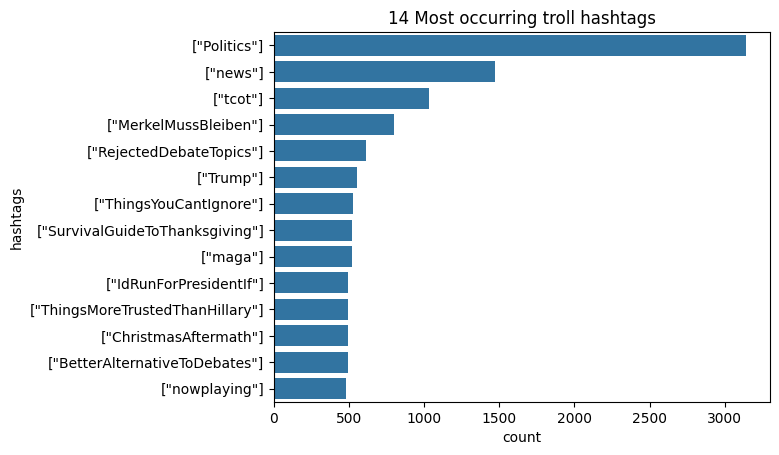

In [11]:
sns.barplot(data=most_occurring_hastgags, x="count", y="hashtags").set(title = "14 Most occurring troll hashtags")

## Histograms - users' accounts creation and tweet submissions

In [12]:
creation_data = tweets.sort_values("created_at", ascending = True).created_str.dropna().map(lambda x: x[0:7])

In [13]:
res = pd.DataFrame(pd.DataFrame(creation_data).groupby("created_str")["created_str"].count())

res.columns = ["count"]
res2 = res.reset_index()
res2

created_str  count
0      2014-07     12
1      2014-08      1
2      2014-09      1
3      2014-11    388
4      2014-12    442
5      2015-01   2191
6      2015-02   2091
7      2015-03   2325
8      2015-04   2250
9      2015-05   1900
10     2015-06   3611
11     2015-07   1697
12     2015-08   1016
13     2015-09    325
14     2015-10   1070
15     2015-11    971
16     2015-12   3949
17     2016-01   1749
18     2016-02   5192
19     2016-03   3792
20     2016-04    443
21     2016-05   1942
22     2016-06   1047
23     2016-07   7276
24     2016-08  11663
25     2016-09  25639
26     2016-10  27971
27     2016-11  21802
28     2016-12  19965
29     2017-01  21067
30     2017-02  10151
31     2017-03   8186
32     2017-04   4591
33     2017-05    638
34     2017-06    694
35     2017-07   3938
36     2017-08   1407
37     2017-09     37

In [ ]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Number of troll posts on tweeter over time'}, xlabel='Year and Month', ylabel='Occurrences of troll posts'>

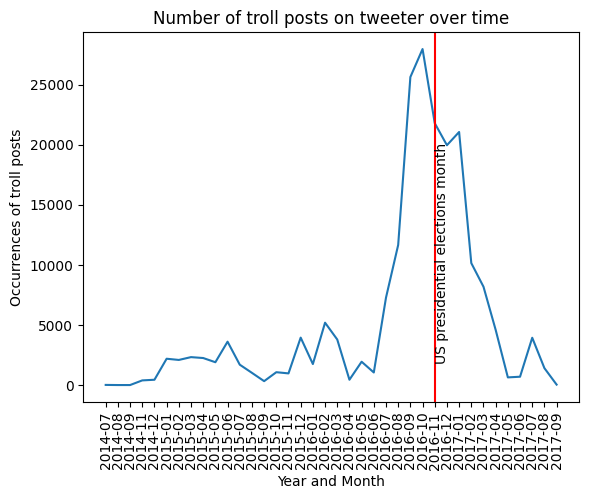

In [16]:
g = sns.lineplot(x="created_str", y="count", data=res2)
g.axvline("2016-11", color = "red")
g.set_title("Number of troll posts on tweeter over time")
g.set_xlabel("Year and Month")
g.set_ylabel("Occurrences of troll posts")
plt.text("2016-11",2000,'US presidential elections month',rotation=90)
plt.xticks(rotation=90)

g

In [225]:
res = pd.DataFrame(pd.DataFrame(creation_data).groupby("created_at")["created_at"].count())

res.columns = ["count"]
res2 = res.reset_index()
res2

created_at  count
0     Apr2014     12
1     Apr2016      6
2     Aug2013     94
3     Aug2014      7
4     Aug2015      1
5     Aug2016      2
6     Dec2009      1
7     Dec2011      1
8     Dec2012      1
9     Dec2013      1
10    Dec2014      6
11    Dec2015      1
12    Feb2011      2
13    Feb2014      1
14    Feb2016      4
15    Jan2012      1
16    Jan2015      1
17    Jan2016      2
18    Jul2013     13
19    Jul2014      4
20    Jul2016     18
21    Jun2013     11
22    Jun2014     49
23    Jun2015      1
24    Jun2016      2
25    Mar2012      1
26    Mar2014      9
27    Mar2015     15
28    Mar2016      1
29    May2009      1
30    May2014     64
31    May2016      3
32    Nov2009      1
33    Nov2015     13
34    Oct2014      4
35    Oct2015      8
36    Oct2016      1
37    Sep2013     16
38    Sep2014      1
39    Sep2015      3

In [237]:
res2["year"] = res2.created_at.map(lambda x: x[3:])
happy_map = {"Jan":1, "Feb": 2, "Mar": 3, "Apr":4, "May": 5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11,"Dec":12}
res2["month"] = res2.created_at.map(lambda x: x[0:3]).map(happy_map)
res2 = res2.sort_values(["year", "month"])

In [246]:
res2.tail(10)

created_at  count  year  month
11    Dec2015      1  2015     12
17    Jan2016      2  2016      1
14    Feb2016      4  2016      2
28    Mar2016      1  2016      3
1     Apr2016      6  2016      4
31    May2016      3  2016      5
24    Jun2016      2  2016      6
20    Jul2016     18  2016      7
5     Aug2016      2  2016      8
36    Oct2016      1  2016     10

<AxesSubplot: title={'center': 'Dates of creation of troll accounts on tweeter over time'}, xlabel='Year and Month', ylabel='Occurrences of troll accounts creation'>

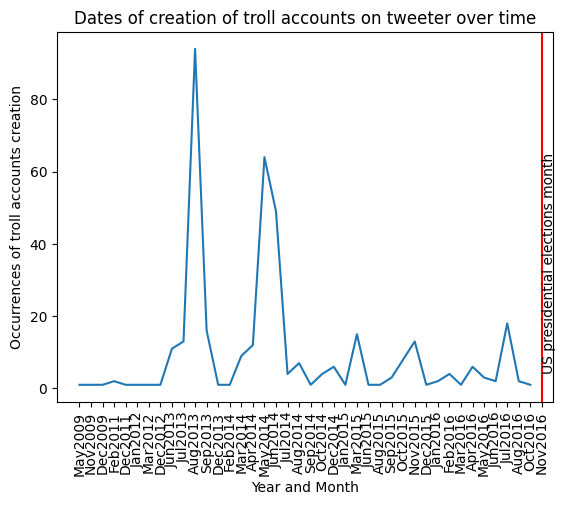

In [242]:
g = sns.lineplot(x="created_at", y="count", data=res2)
g.axvline("Nov2016", color = "red")
g.set_title("Dates of creation of troll accounts on tweeter over time")
g.set_xlabel("Year and Month")
g.set_ylabel("Occurrences of troll accounts creation")
plt.text("Nov2016",5,'US presidential elections month',rotation=90)
plt.xticks(rotation=90)

g

Many troll user accounts were created far before the elections day, but there was a pike in July 2016

## Analysis of retweet users network

In [131]:
idczek = tweets.retweeted_status_id.to_list()[4]
idczek

7.775914782060298e+17

In [133]:
idczek in tweets.tweet_id.to_list()

False

In [3]:
# tweet_id: user_id  map

mapp = tweets.loc[:, ["tweet_id", "user_key"]]
tweet_network = tweets.loc[:, ["user_key", "retweeted_status_id"] ]

tweet_network.columns = ["user_key", "tweet_id"]

In [137]:
tweet_network.head()

user_key      tweet_id
0        kathiemrr           NaN
1   traceyhappymom           NaN
2    evewebster373           NaN
3      blacktolive           NaN
4  jacquelinisbest  7.775915e+17

In [138]:
mapp.head()

tweet_id         user_key
0  8.362279e+17        kathiemrr
1  7.651989e+17   traceyhappymom
2  6.160023e+17    evewebster373
3  7.766933e+17      blacktolive
4  7.775946e+17  jacquelinisbest

In [4]:
aux = mapp.merge(tweet_network.dropna(), on='tweet_id', how='inner')

aux2 = aux.loc[:,["user_key_x", "user_key_y"]]

aux2.columns = ["Source", "Target"]

In [5]:
aux2

Source          Target
0       trayneshacole        gloed_up
1      thefoundingson  thefoundingson
2     garrettsimpson_     heyits_toby
3     garrettsimpson_     emileewaren
4        patriotblake     heyits_toby
...               ...             ...
2623   traceyhappymom      jasper_fly
2624   traceyhappymom    cassieweltch
2625          ten_gop   kateritterrrr
2626    dominicvalent       puredavie
2627    dominicvalent    bruciedublin

[2628 rows x 2 columns]

filtering the data because of computational complexity of calculating pagerank

In [123]:
aux3 = aux2.groupby("Target")["Target"].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
aux3

Target  count
51       giselleevns    238
89    melvinsroberts    111
114         rightnpr     84
112      realten_gop     84
52          gloed_up     80
107        puredavie     80
122       tpartynews     74
20          c__wells     69
59   hollandpatrickk     69
33       daileyjadon     68

In [124]:
# aux2.filter("Target" in aux3.Target.to_list())

aux4 = aux2.loc[aux2['Target'].apply(lambda x: x in aux3.Target.to_list())]

In [52]:
aux2.shape

(2628, 2)

In [125]:
aux4.shape

(957, 2)

In [128]:

class PageRankGraph:
    def __init__(self, G: nx.Graph, d:float=0.55, it:int =2000): # d = 0.55, an arbitrary hyperparameter
        self.d = d
        self.it = it
        self.G = G
        
        aux = nx.linalg.adjacency_matrix(G).todense()
        self.A = aux / aux.sum(axis=1)
        self.PR = np.ones(len(G.nodes)).reshape(1, -1)
    def update_pageRank(self):
        self.PR =  self.PR @ self.A
        self.PR = self.PR/self.PR.sum()
        self.PR = self.d/len(self.PR) + (1-self.d)*self.PR
    def get_pageRank(self):
        for i in range(self.it):
            self.update_pageRank()
        return np.array(self.PR).reshape(-1)

In [129]:
G = nx.from_pandas_edgelist(aux4, 'Source', 'Target', create_using=nx.MultiGraph())

In [130]:
pagerank = PageRankGraph(G).get_pageRank()
pagerank

C:\Users\patry\AppData\Local\Temp\ipykernel_11720\487801657.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  aux = nx.linalg.adjacency_matrix(G).todense()


array([0.55083905, 0.57292954, 0.62355548, 0.55010157, 0.65801091,
       0.55059256, 0.55656925, 0.55687509, 0.56992006, 0.55753233,
       0.55082336, 0.55020314, 0.55070257, 0.55016774, 0.59167697,
       0.55159783, 0.58672253, 0.55010772, 0.55009314, 0.62962528,
       0.5506857 , 0.55091107, 0.55106669, 0.56955401, 0.55010157,
       0.55010157, 0.55010772, 0.55111291, 0.55014013, 0.55058413,
       0.55027942, 0.55122768, 0.55049099, 0.55047413, 0.55010309,
       0.55010607, 0.5508809 , 0.55004472, 0.55120721, 0.55074512,
       0.55022362, 0.55054976, 0.55049942, 0.55117368, 0.55107696,
       0.55098276, 0.55002236, 0.55055017, 0.55076278, 0.55091349,
       0.55050786, 0.55050786, 0.55028785, 0.55037256, 0.55078727,
       0.55020314, 0.55006002, 0.55039785, 0.55010157, 0.55029628,
       0.55004666, 0.55007628, 0.55002236, 0.55018628, 0.55009314,
       0.55006002, 0.55006002, 0.55007006, 0.55010157, 0.55010157,
       0.55002236, 0.5500477 , 0.55002236, 0.55010157, 0.55004

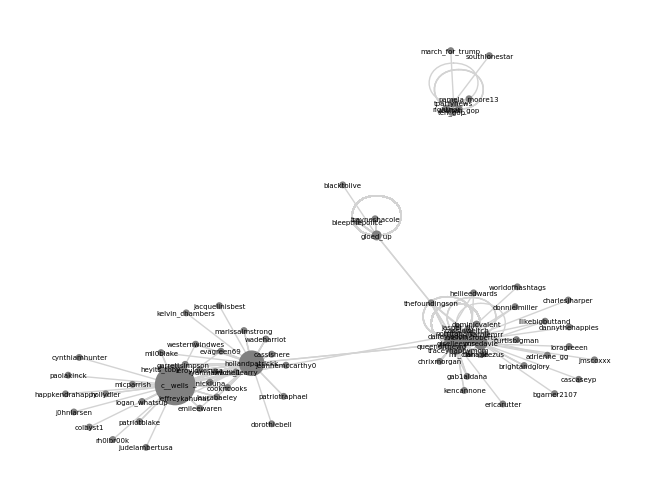

In [258]:
import matplotlib.pyplot as plt

nx.draw_spring(G, with_labels=True, node_size=(pagerank**22)*8000000, arrowsize = 0.02, font_size = 5, font_color = "black", node_color = "gray", edge_color = "lightgray")

There are **3** ( maybe 4) **discernible communities** if we take into account 10 the most retweeted user accounts.

It looks like there were in reality more than 1 troll writing troll posts on tweeter. But the number of trolls was not that high, they were usually creating an *artificial crowd*.

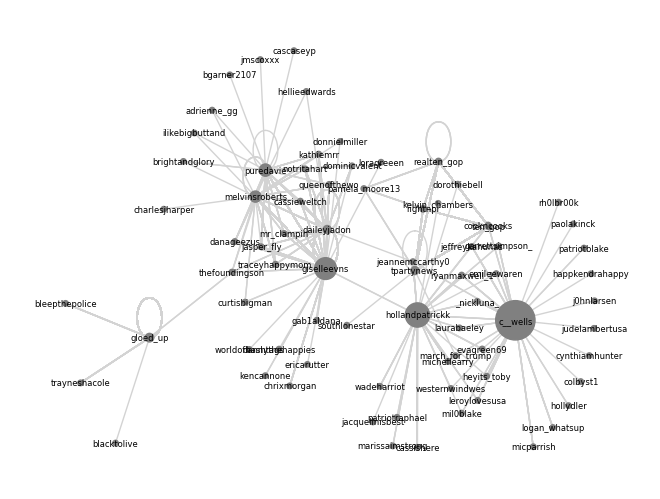

In [256]:
nx.draw_kamada_kawai(G, with_labels=True, node_size=(pagerank**22)*8000000, arrowsize = 0.02, font_size = 6, font_color = "black", node_color = "gray", edge_color = "lightgray")





**c_wells** is the user with the highest value of pagerank among all other troll users

#### P12.2 Your task is to prepare an infographics/presentation/report containing the most interesting conclusions from the analysis of the results of task P12.1. [6P]

(*Russian_trolls.pdf* presentation in this directory)

In [18]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


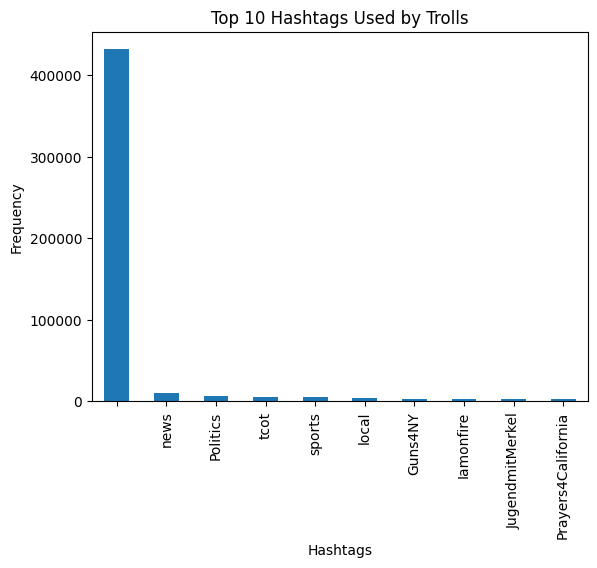

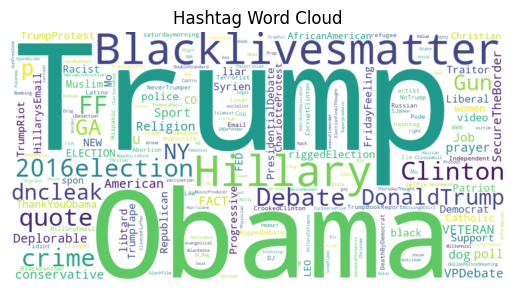

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Merge datasets
data = pd.merge(tweets, users, left_on='user_id', right_on='id', how='left')

# Hashtag analysis
data['hashtags'] = data['hashtags'].str.strip('[]').str.replace('"', '').str.split(',')
hashtags = data.explode('hashtags')['hashtags'].value_counts()

# Plot top 10 hashtags
hashtags.head(10).plot(kind='bar', title='Top 10 Hashtags Used by Trolls')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

# Word Cloud
text = ' '.join(hashtags.index)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag Word Cloud')
plt.show()


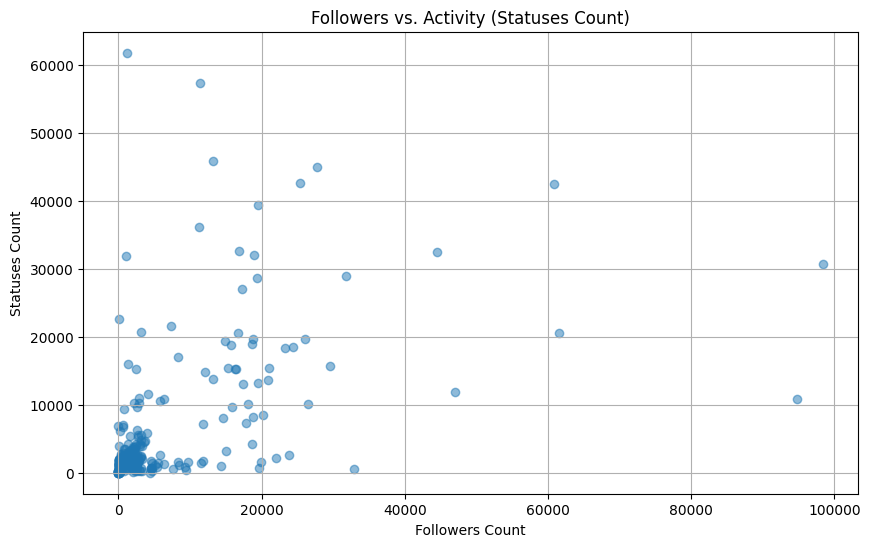

In [20]:
# Scatter Plot: Follower Count vs. Statuses Count
plt.figure(figsize=(10, 6))
plt.scatter(users['followers_count'], users['statuses_count'], alpha=0.5)
plt.title('Followers vs. Activity (Statuses Count)')
plt.xlabel('Followers Count')
plt.ylabel('Statuses Count')
plt.grid(True)
plt.show()


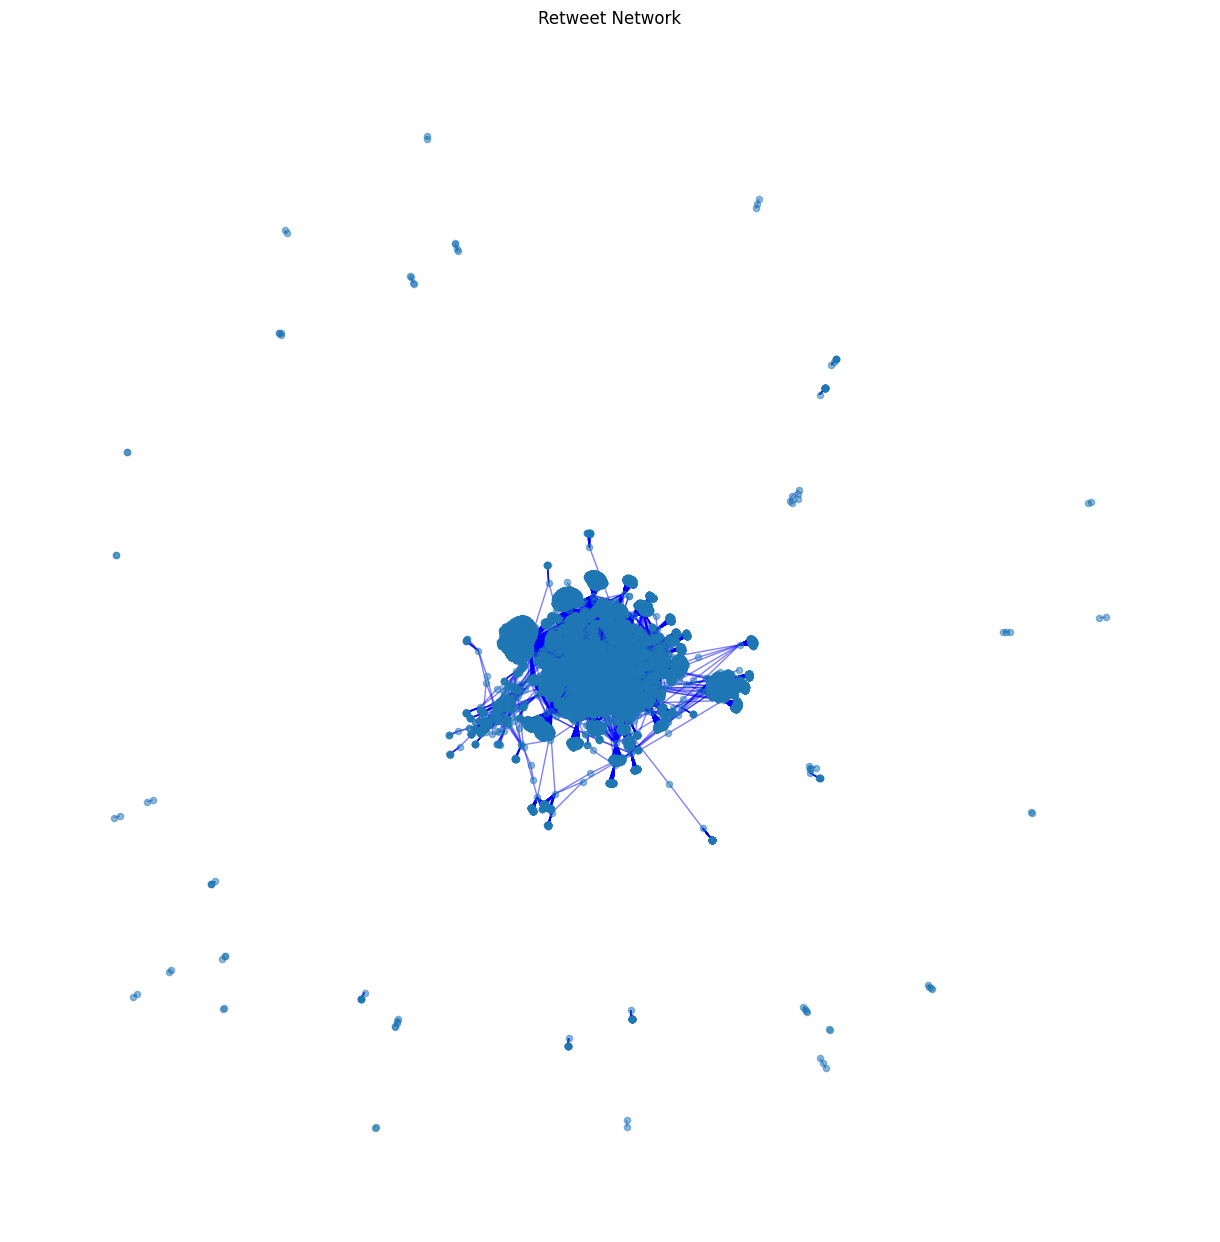

In [22]:
import networkx as nx

# Build a retweet network
retweets = tweets[~tweets['retweeted_status_id'].isnull()]
edges = retweets[['user_id', 'retweeted_status_id']].dropna()
G = nx.from_pandas_edgelist(edges, source='user_id', target='retweeted_status_id')

# Plot the retweet network
plt.figure(figsize=(14, 12))
nx.draw(G, with_labels=False, node_size=20, edge_color='blue', alpha=0.5)
plt.title('Retweet Network')
plt.show()


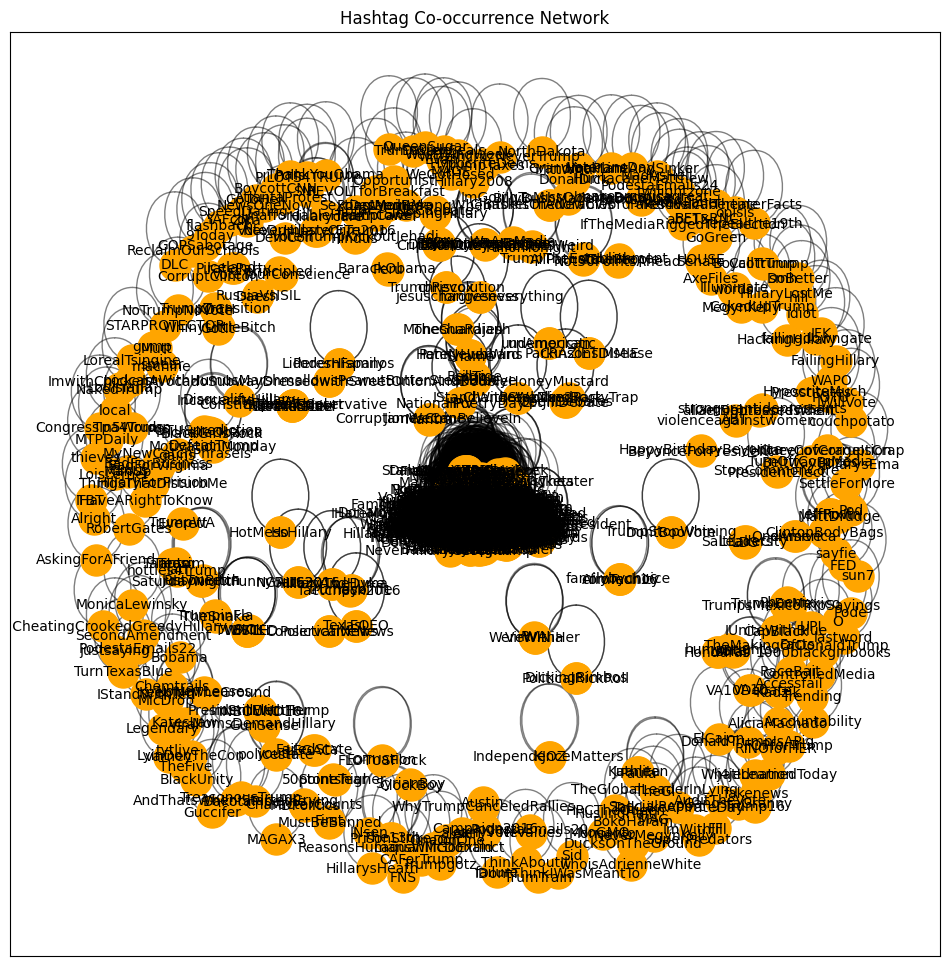

In [23]:
from itertools import combinations
from collections import Counter

# Extract co-occurring hashtags
co_occurrence = []
for hashtags in data['hashtags'].dropna():
    co_occurrence.extend(combinations(sorted(hashtags), 2))

# Count co-occurrences and build a graph
co_counts = Counter(co_occurrence)
G = nx.Graph()
for (tag1, tag2), count in co_counts.items():
    if count > 2:  # Filter for co-occurrences greater than 2
        G.add_edge(tag1, tag2, weight=count)

# Plot co-occurrence network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='orange')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title('Hashtag Co-occurrence Network')
plt.show()


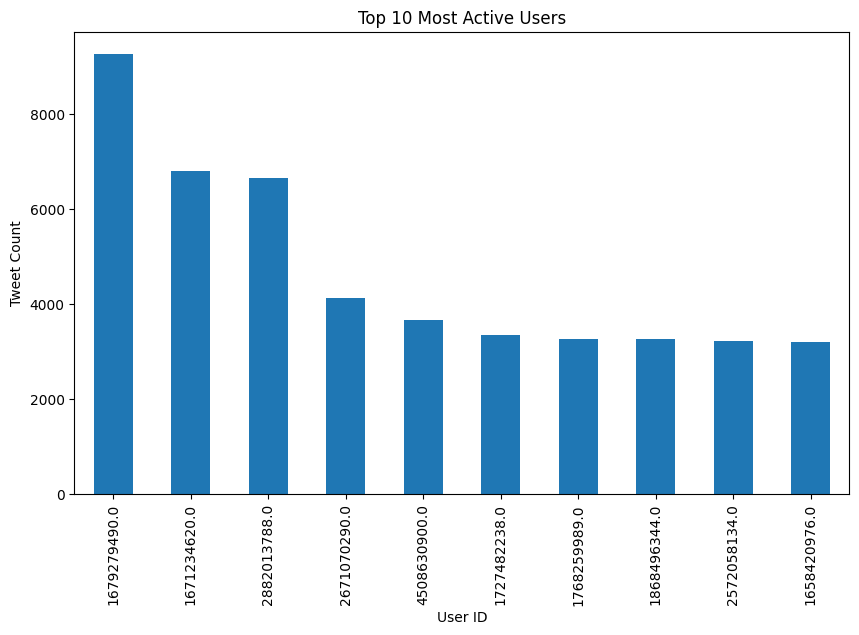

In [24]:
# Most active users
most_active = tweets['user_id'].value_counts().head(10)

most_active.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Tweet Count')
plt.show()


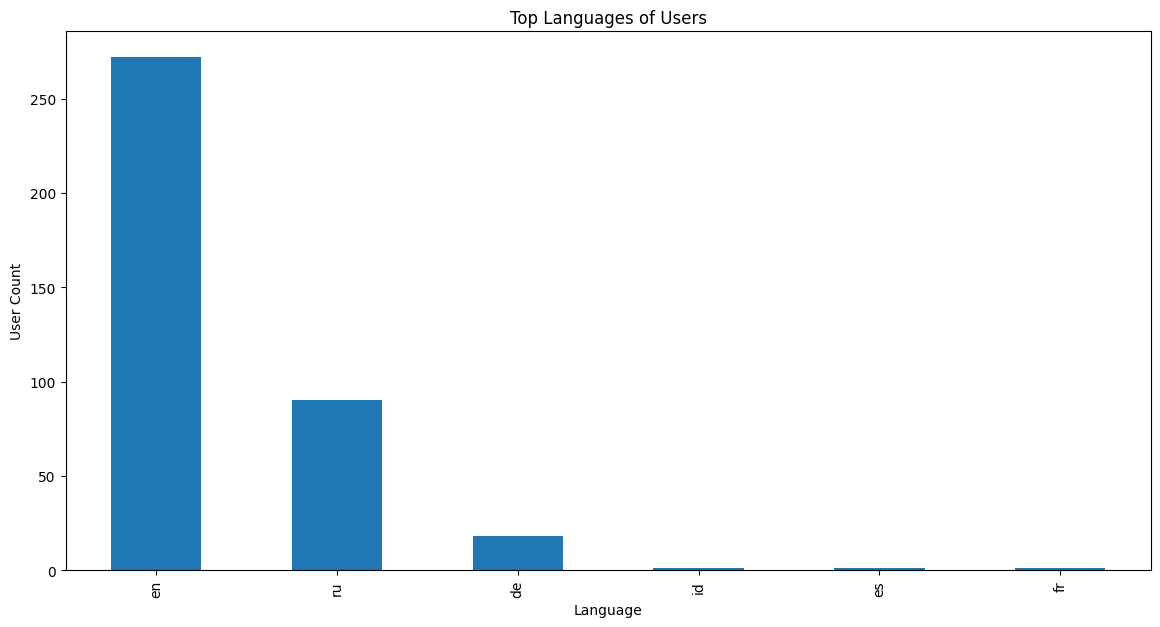

In [41]:
# Language distribution
language_dist = users['lang'].value_counts()

language_dist.head(10).plot(kind='bar', figsize=(14, 7), title='Top Languages of Users')
plt.xlabel('Language')
plt.ylabel('User Count')
plt.show()


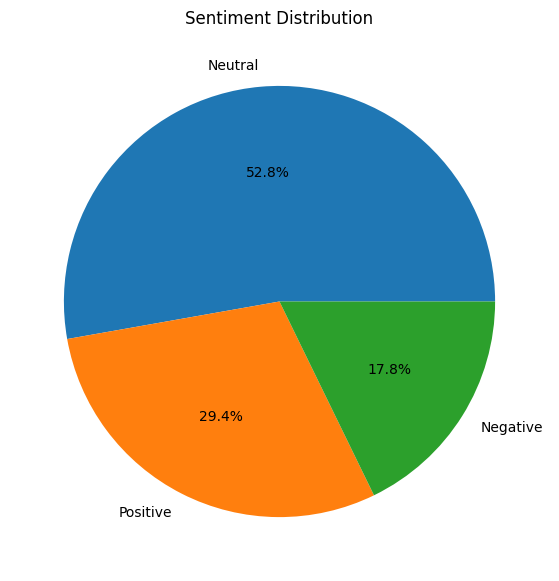

In [ ]:
from textblob import TextBlob

# Sentiment analysis
tweets['sentiment'] = tweets['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sentiment_dist = tweets['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
).value_counts()

sentiment_dist.plot(kind='pie', autopct='%1.1f%%', figsize=(17, 8), title='Sentiment Distribution')
plt.ylabel('')
plt.show()


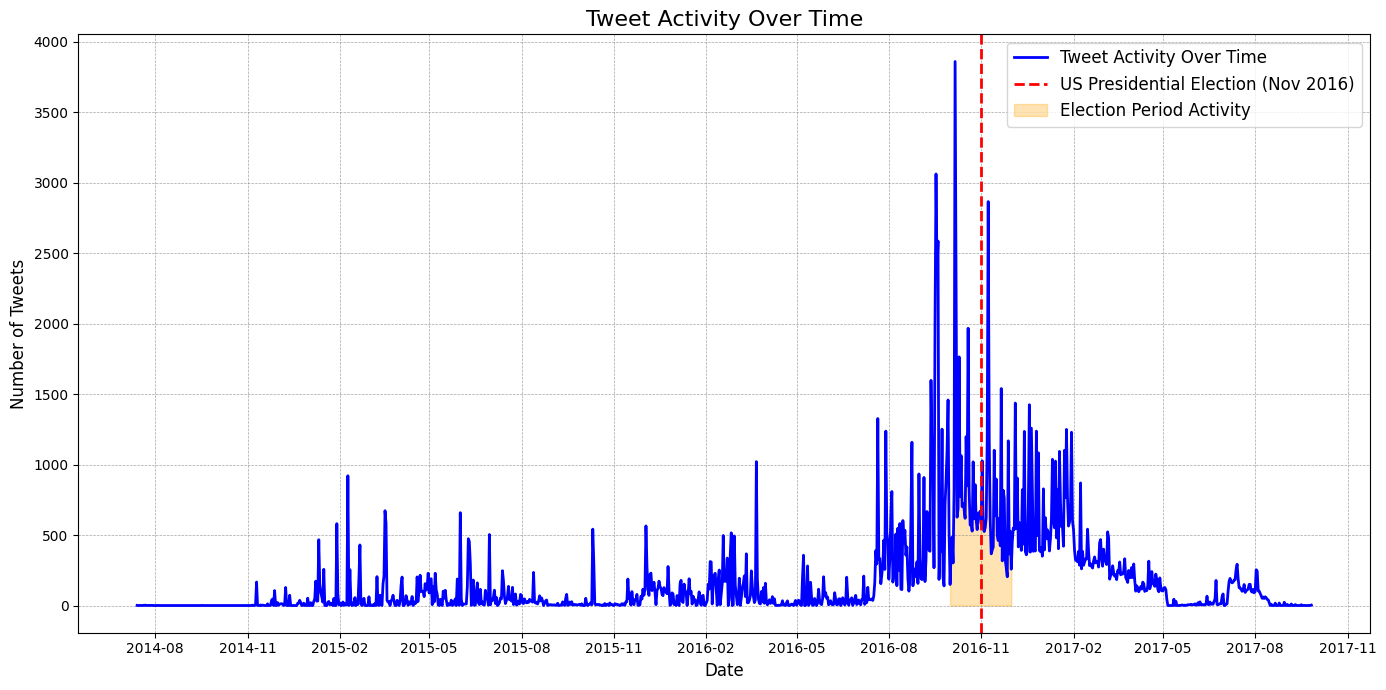

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot tweet activity
plt.figure(figsize=(14, 7))
plt.plot(activity_over_time, lw=2, color='blue', label='Tweet Activity Over Time')

# Mark the US presidential election month
election_date = '2016-11'
plt.axvline(pd.to_datetime(election_date), color='red', linestyle='--', lw=2, label='US Presidential Election (Nov 2016)')

# Highlight the peak period
plt.fill_between(activity_over_time.index, activity_over_time, where=(activity_over_time.index >= '2016-10') & (activity_over_time.index <= '2016-12'),
                 color='orange', alpha=0.3, label='Election Period Activity')

# Customize x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Tick every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Titles and labels
plt.title('Tweet Activity Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)

# Add legend
plt.legend(fontsize=12)

# Adjust grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [36]:
!pip install python-louvain

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=ed7b736fd35586b1085ee97bfa2f9c8e6f8d28e6e1435fb3660ba93e01a2693f
  Stored in directory: c:\users\filip\appdata\local\pip\cache\wheels\11\c1\e7\f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Number of nodes: 32638
Number of edges: 39032
Density: 3.66426636003539e-05
Number of communities: 74
Community 1: 5491 nodes
Community 2: 3029 nodes
Community 3: 2526 nodes
Community 4: 2088 nodes
Community 5: 1370 nodes
Number of communities (Louvain): 72


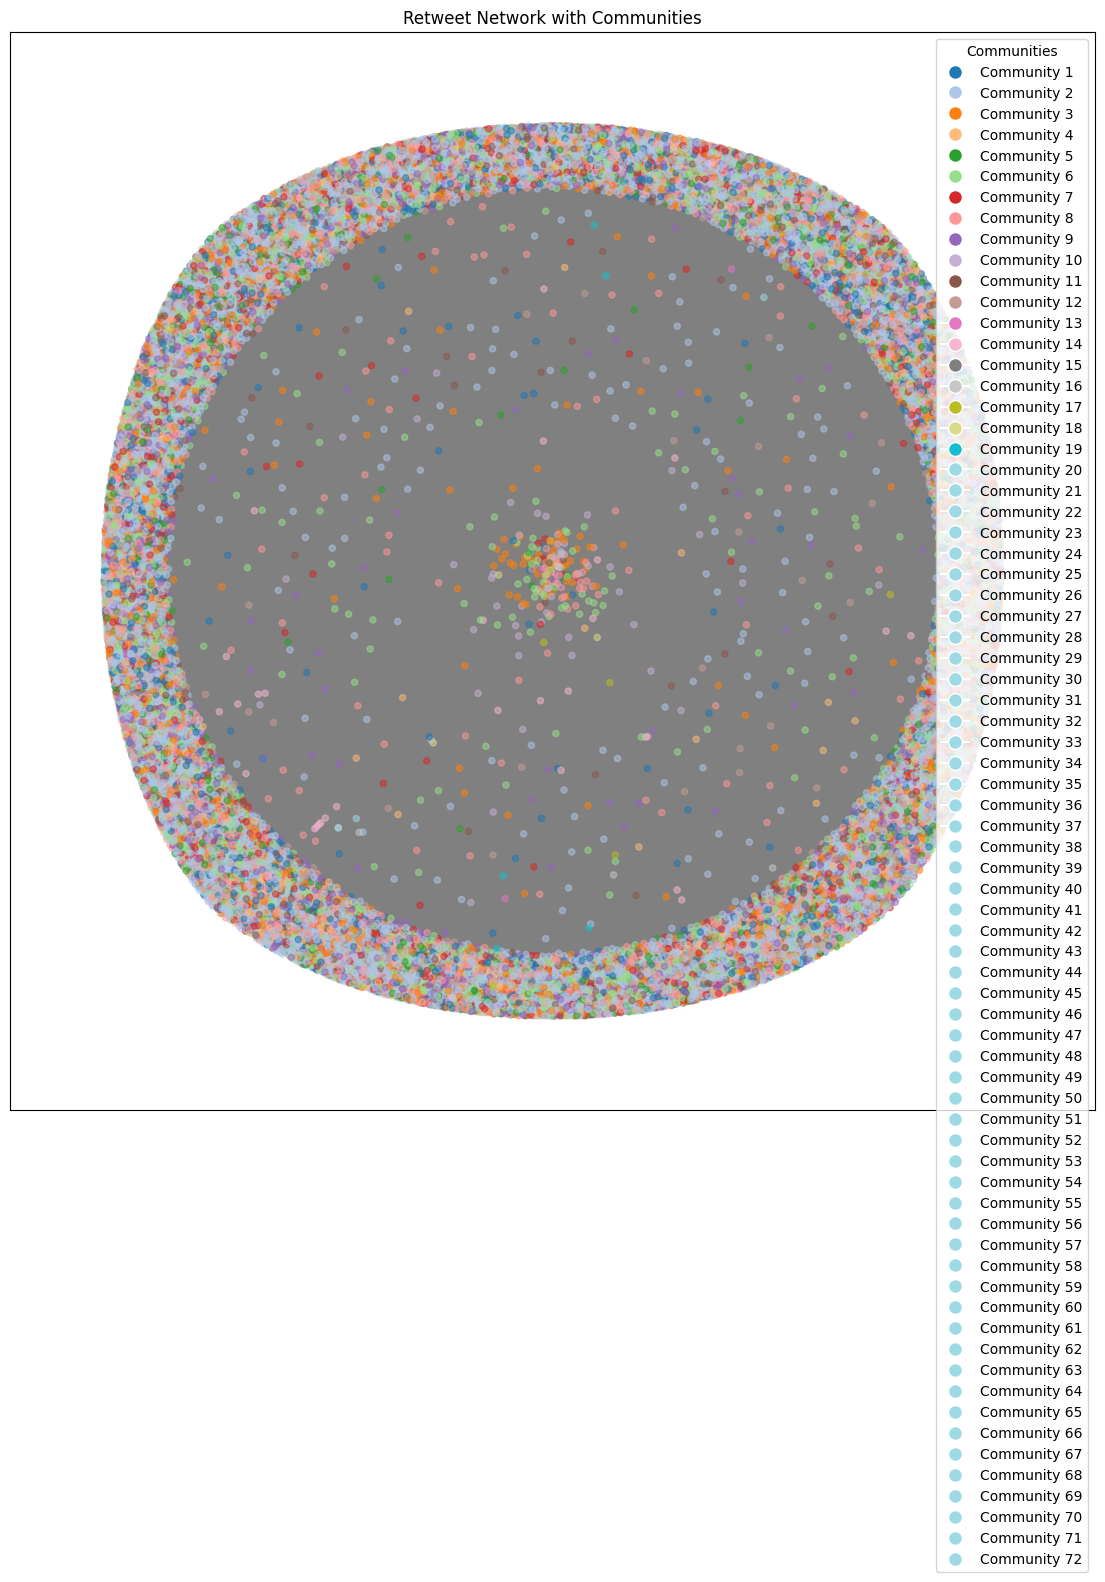

In [38]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
from community import community_louvain
import matplotlib.dates as mdates

# Load the data
tweets = pd.read_csv('tweets.csv')

# Filter out retweets
retweets = tweets[~tweets['retweeted_status_id'].isnull()]

# Build the graph
edges = retweets[['user_id', 'retweeted_status_id']].dropna()
H = nx.from_pandas_edgelist(edges, source='user_id', target='retweeted_status_id', create_using=nx.DiGraph())


# General graph properties
num_nodes = H.number_of_nodes()
num_edges = H.number_of_edges()
density = nx.density(H)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Density: {density}")

# Detect communities using Greedy Modularity
communities = list(greedy_modularity_communities(H.to_undirected()))
print(f"Number of communities: {len(communities)}")
for i, community in enumerate(communities[:5]):
    print(f"Community {i+1}: {len(community)} nodes")

# Detect communities using Louvain Method
partition = community_louvain.best_partition(H.to_undirected())
print(f"Number of communities (Louvain): {len(set(partition.values()))}")

# Assign communities as node attributes for visualization
color_map = [partition[node] if node in partition else 0 for node in H.nodes]

plt.figure(figsize=(14, 14))
nx.draw_networkx(H, node_color=color_map, node_size=20, edge_color='gray', alpha=0.5, with_labels=False, cmap=plt.cm.tab20)
plt.title('Retweet Network with Communities')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f'Community {i+1}', markerfacecolor=plt.cm.tab20(i/20), markersize=10) for i in range(len(set(partition.values())))], title='Communities', loc='upper right')
plt.show()

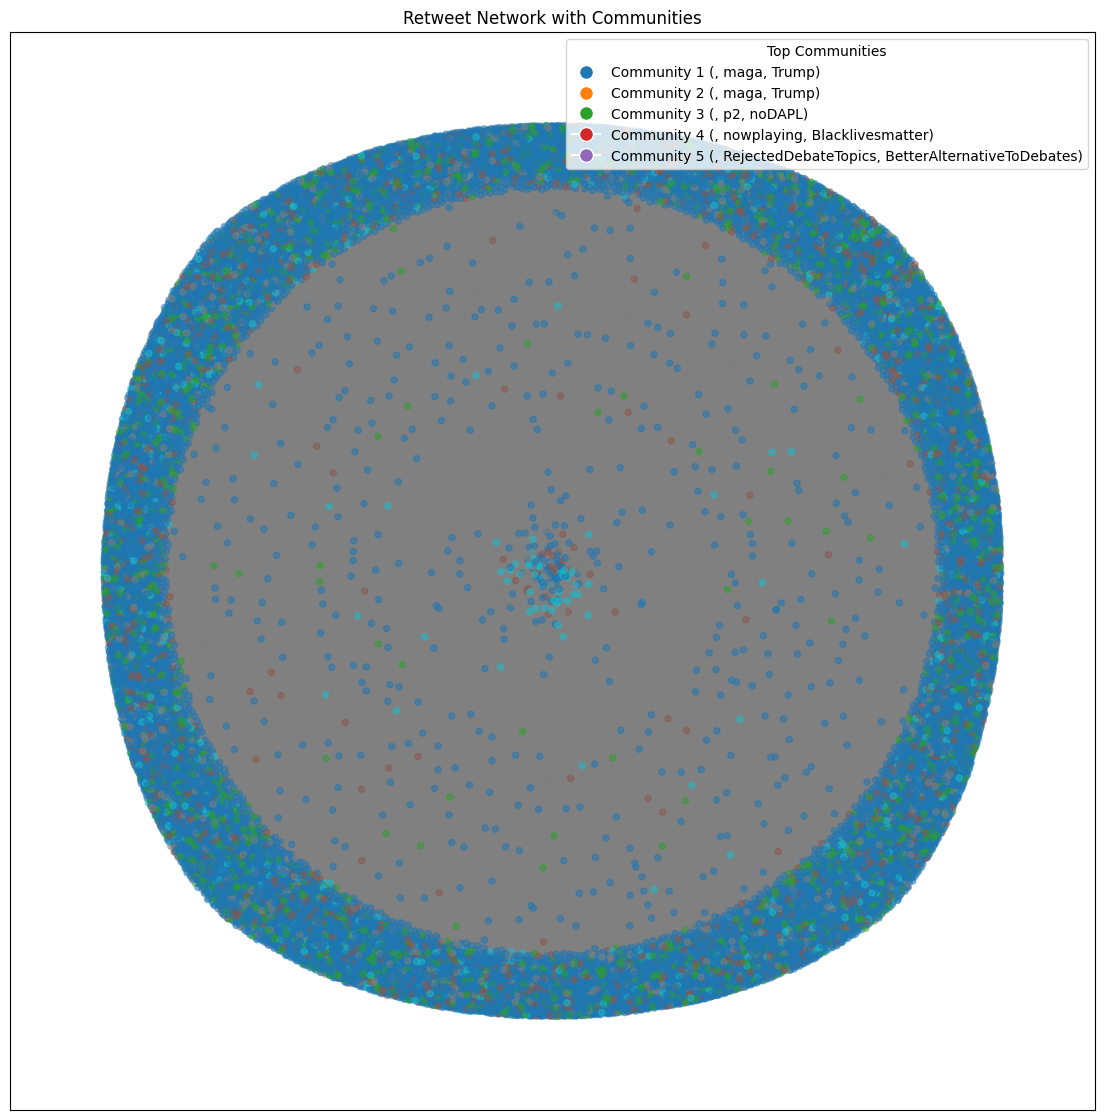

In [40]:
import matplotlib.pyplot as plt
import networkx as nx

# Filter to only the 5 largest communities
largest_communities = sorted(communities, key=len, reverse=True)[:5]

# Assign names to the 5 largest communities based on tweet content
community_names = []
for i, community in enumerate(largest_communities):
    community_users = list(community)
    community_tweets = tweets[tweets['user_id'].isin(community_users)]
    hashtags = community_tweets['hashtags'].str.strip('[]').str.replace('"', '').str.split(',').explode()
    top_hashtags = hashtags.value_counts().head(3).index.tolist()
    name = f"Community {i+1} ({', '.join(top_hashtags)})"
    community_names.append(name)

# Assign communities as node attributes for visualization
partition = {node: i for i, community in enumerate(largest_communities) for node in community}
color_map = [partition[node] if node in partition else 0 for node in H.nodes]

plt.figure(figsize=(14, 14))
nx.draw_networkx(H, node_color=color_map, node_size=20, edge_color='gray', alpha=0.5, with_labels=False, cmap=plt.cm.tab10)
plt.title('Retweet Network with Communities')

# Add a legend for community names
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=community_names[i], markerfacecolor=plt.cm.tab10(i/10), markersize=10) for i in range(len(largest_communities))]
plt.legend(handles=legend_handles, title='Top Communities', loc='upper right', fontsize=10)
plt.show()


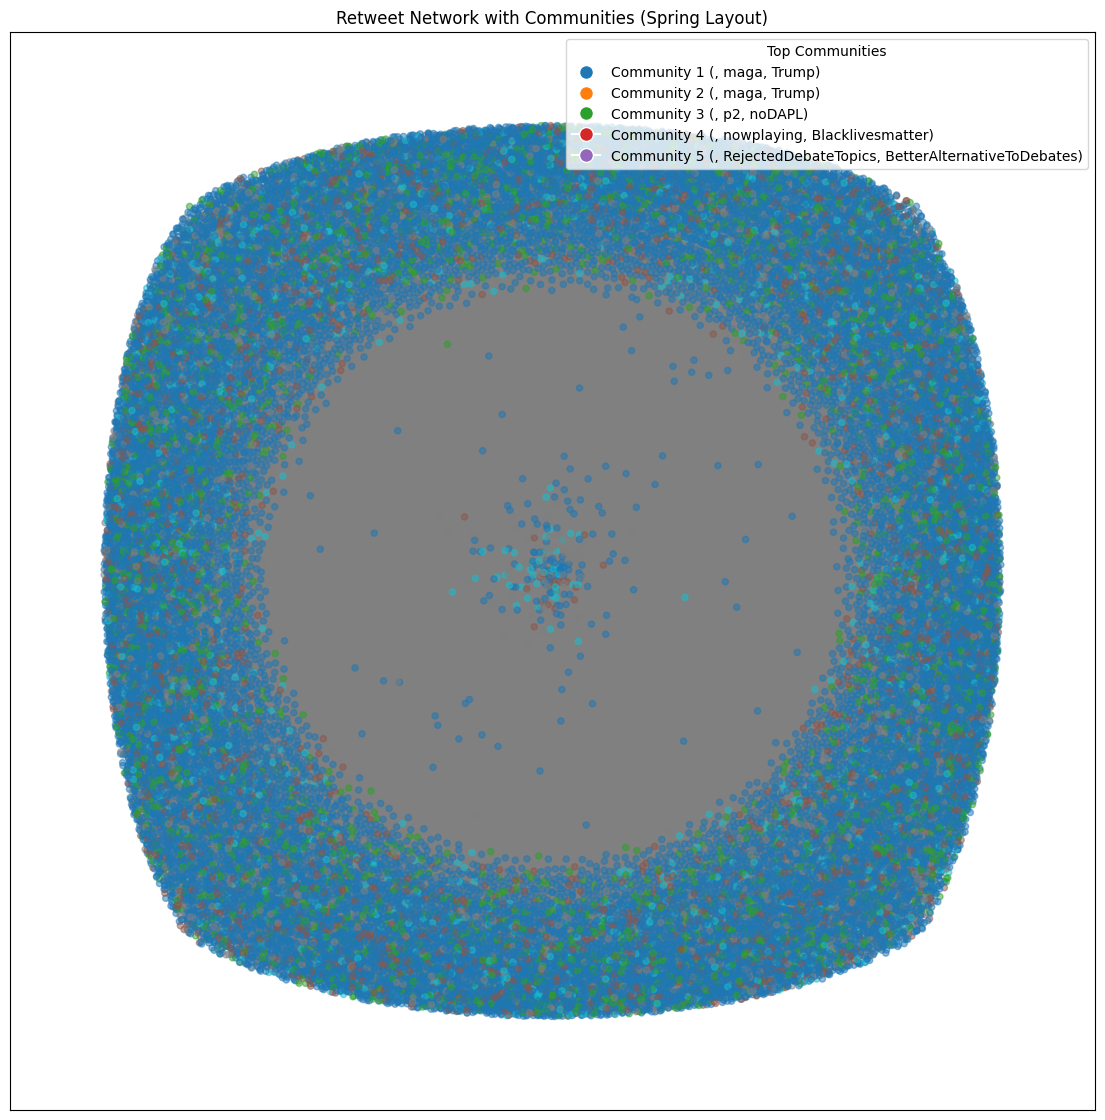

In [43]:
import matplotlib.pyplot as plt
import networkx as nx

# Generate the spring layout with 15 iterations
pos = nx.spring_layout(H, iterations=15)

# Plot the graph
plt.figure(figsize=(14, 14))
nx.draw_networkx(H, pos, node_color=color_map, node_size=20, edge_color='gray', alpha=0.5, with_labels=False, cmap=plt.cm.tab10)
plt.title('Retweet Network with Communities (Spring Layout)')

# Add a legend for community names
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=community_names[i], markerfacecolor=plt.cm.tab10(i/10), markersize=10) for i in range(len(community_names))]
plt.legend(handles=legend_handles, title='Top Communities', loc='upper right', fontsize=10)
plt.show()


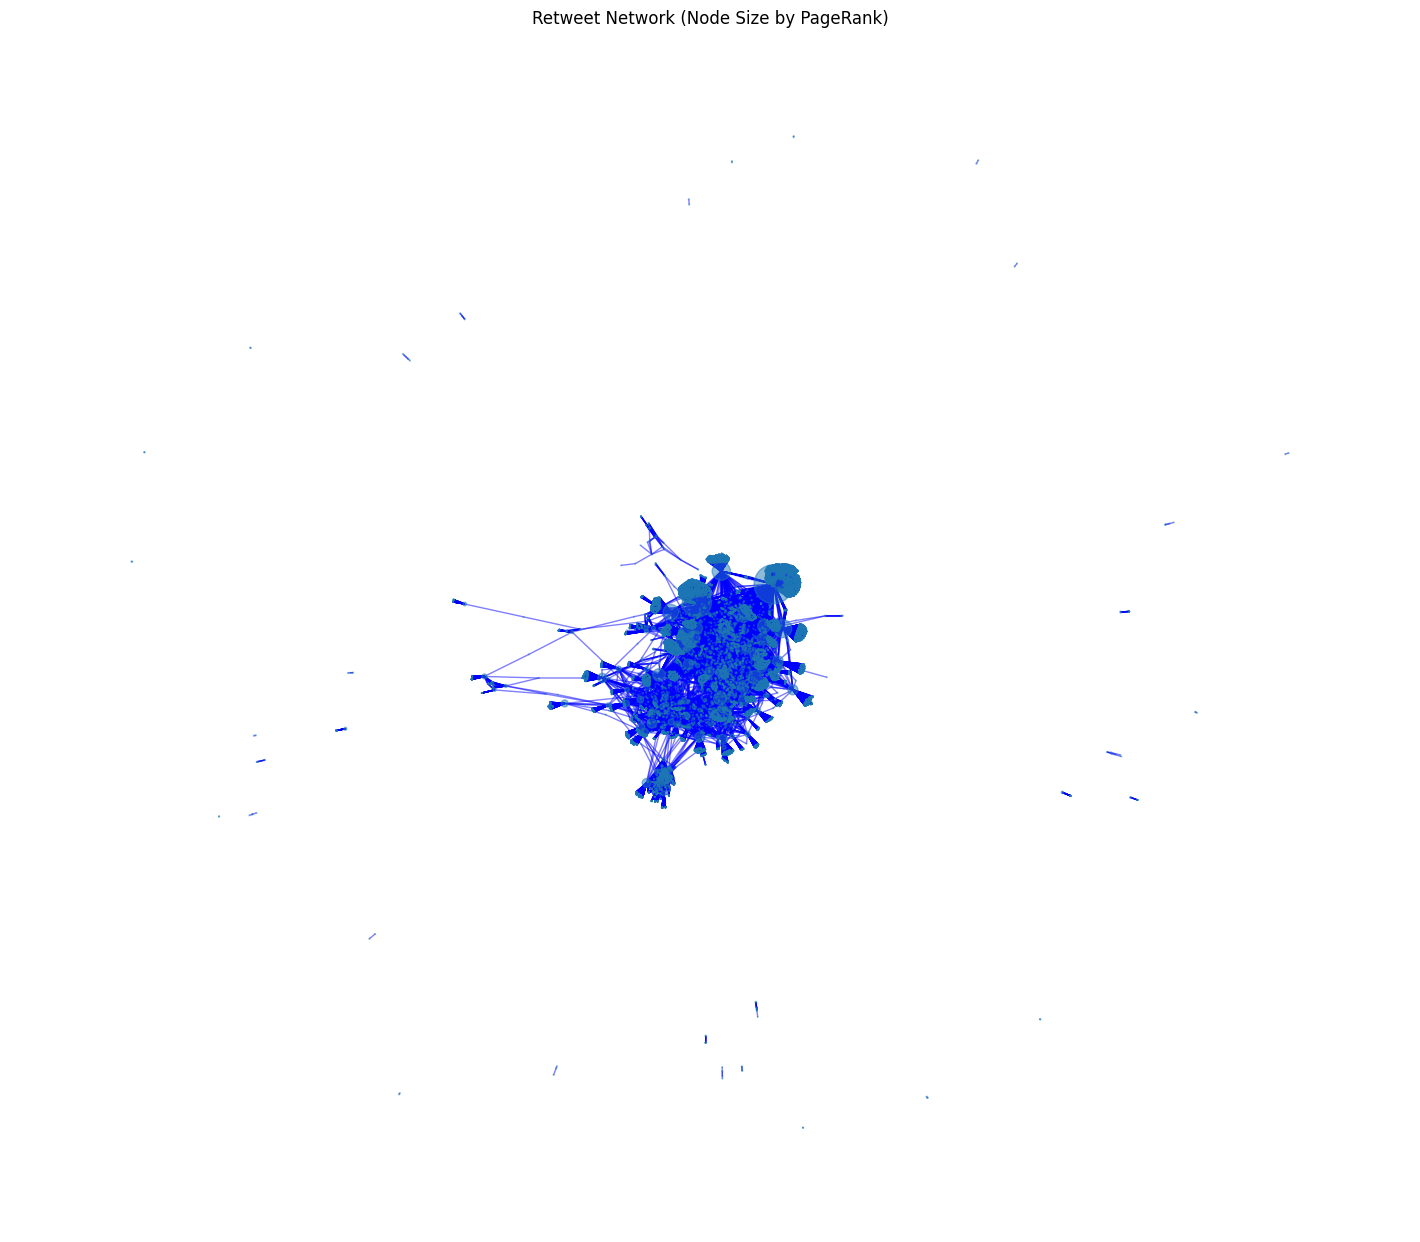

Top 10 nodes by PageRank:
Node: 1679279490.0, PageRank: 0.07882252985079859
Node: 1671234620.0, PageRank: 0.04424367848992721
Node: 1661246144.0, PageRank: 0.017275540094493322
Node: 1662779209.0, PageRank: 0.01716734479387774
Node: 2606301939.0, PageRank: 0.0166304344423258
Node: 2671070290.0, PageRank: 0.01272247920171781
Node: 2535166748.0, PageRank: 0.009611051305178222
Node: 2491081213.0, PageRank: 0.008849440365858295
Node: 1651693646.0, PageRank: 0.00881298724841066
Node: 1629828379.0, PageRank: 0.008718988047067354


In [44]:
import networkx as nx
import matplotlib.pyplot as plt


retweets = tweets[~tweets['retweeted_status_id'].isnull()]
edges = retweets[['user_id', 'retweeted_status_id']].dropna()
G = nx.from_pandas_edgelist(edges, source='user_id', target='retweeted_status_id')

# Compute PageRank
pagerank_scores = nx.pagerank(G)

# Add PageRank scores as node attributes
nx.set_node_attributes(G, pagerank_scores, 'pagerank')

# Plot the retweet network with nodes sized by their PageRank
plt.figure(figsize=(14, 12))
node_sizes = [pagerank_scores[node] * 10000 for node in G.nodes]  # Scale up for better visualization
nx.draw(G, with_labels=False, node_size=node_sizes, edge_color='blue', alpha=0.5)
plt.title('Retweet Network (Node Size by PageRank)')
plt.show()

# Print top 10 nodes by PageRank
top_10_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by PageRank:")
for node, score in top_10_nodes:
    print(f"Node: {node}, PageRank: {score}")


In [45]:
# Calculate network statistics
# 1. Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 2. Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# 3. Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 4. Eigenvector Centrality
try:
    eigenvector_centrality = nx.eigenvector_centrality(G)
except nx.PowerIterationFailedConvergence:
    eigenvector_centrality = None
    print("Eigenvector centrality calculation did not converge.")

# 5. Density
density = nx.density(G)

# 6. Average Clustering Coefficient
avg_clustering = nx.average_clustering(G)

# 7. Connected Components
connected_components = nx.number_connected_components(G)

# 8. Diameter (only if the graph is connected)
try:
    if nx.is_connected(G):
        diameter = nx.diameter(G)
    else:
        diameter = None
except:
    diameter = None

# Print the calculated statistics
print("Network Statistics:")
print(f"Density: {density}")
print(f"Average Clustering Coefficient: {avg_clustering}")
print(f"Number of Connected Components: {connected_components}")
if diameter is not None:
    print(f"Diameter: {diameter}")
else:
    print("Diameter: Graph is not connected; diameter is undefined.")

# Show top 5 nodes for centralities
def print_top_centrality(centrality_dict, name):
    top_5 = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"\nTop 5 nodes by {name}:")
    for node, value in top_5:
        print(f"Node: {node}, {name}: {value}")

print_top_centrality(degree_centrality, "Degree Centrality")
print_top_centrality(betweenness_centrality, "Betweenness Centrality")
print_top_centrality(closeness_centrality, "Closeness Centrality")
if eigenvector_centrality:
    print_top_centrality(eigenvector_centrality, "Eigenvector Centrality")


Eigenvector centrality calculation did not converge.
Network Statistics:
Density: 7.32853272007078e-05
Average Clustering Coefficient: 0.0
Number of Connected Components: 35
Diameter: Graph is not connected; diameter is undefined.

Top 5 nodes by Degree Centrality:
Node: 1679279490.0, Degree Centrality: 0.1845451481447437
Node: 1671234620.0, Degree Centrality: 0.10745472929497196
Node: 1662779209.0, Degree Centrality: 0.04182369703097712
Node: 1661246144.0, Degree Centrality: 0.04102705518276802
Node: 2606301939.0, Degree Centrality: 0.039893372552624325

Top 5 nodes by Betweenness Centrality:
Node: 1679279490.0, Betweenness Centrality: 0.39627899854760607
Node: 1671234620.0, Betweenness Centrality: 0.24148268843508472
Node: 2606301939.0, Betweenness Centrality: 0.07621355777368134
Node: 1661246144.0, Betweenness Centrality: 0.07543624249338875
Node: 1662779209.0, Betweenness Centrality: 0.07458674540951422

Top 5 nodes by Closeness Centrality:
Node: 1679279490.0, Closeness Centrality: